In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.max_columns = 50

import time
import os

In [28]:
df = pd.read_csv('heart_disease_dataset.csv',delimiter=';')
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [30]:
df.isnull().sum()
# luckily we have no null values

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [31]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age


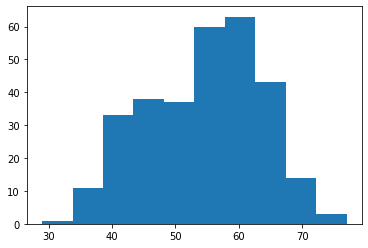

sex


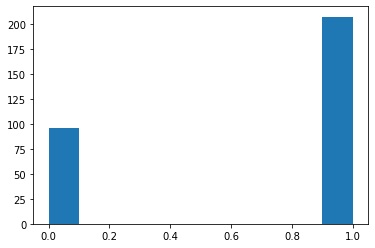

chest_pain_type


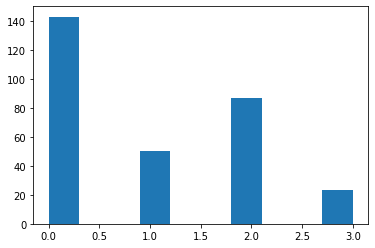

resting_blood_pressure


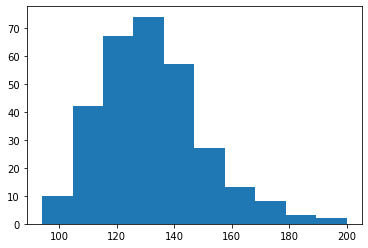

cholesterol


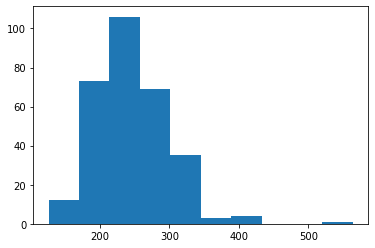

fasting_blood_sugar


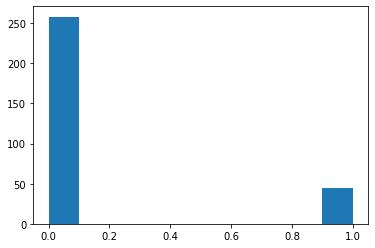

rest_ecg


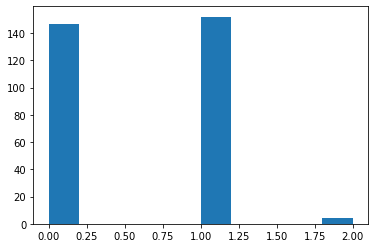

max_heart_rate_achieved


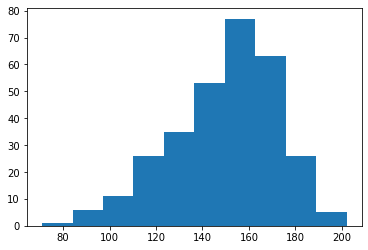

exercise_induced_angina


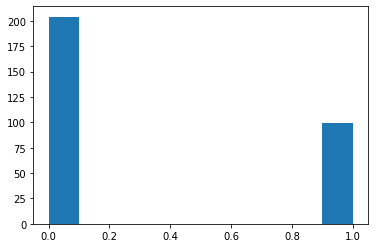

st_depression


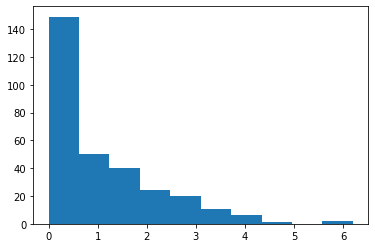

st_slope


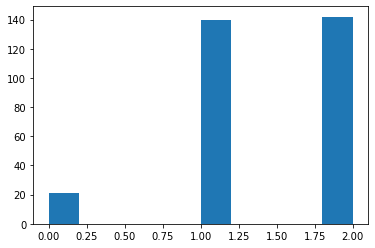

num_major_vessels


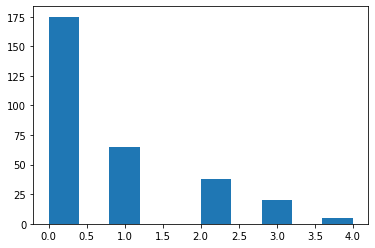

thalassemia


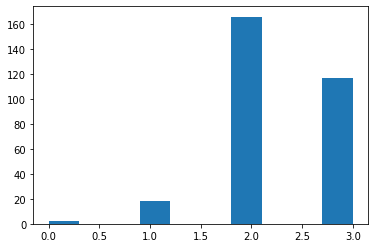

target


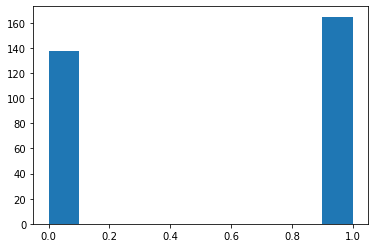

In [32]:
for i in df.columns:
    print(i)
    plt.hist(df[i])
    plt.show() 

# we can clearly see categoric variables.

In [33]:
for i in ['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']:
    print(i, df[i].value_counts(), sep='\n\n', end='\n\n')

chest_pain_type

0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64

fasting_blood_sugar

0    258
1     45
Name: fasting_blood_sugar, dtype: int64

rest_ecg

1    152
0    147
2      4
Name: rest_ecg, dtype: int64

exercise_induced_angina

0    204
1     99
Name: exercise_induced_angina, dtype: int64

st_slope

2    142
1    140
0     21
Name: st_slope, dtype: int64

num_major_vessels

0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64

thalassemia

2    166
3    117
1     18
0      2
Name: thalassemia, dtype: int64



### One hot encoding

In [34]:
# chest pain - nominal - Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic
chest_pain_type = pd.get_dummies(df["chest_pain_type"])
chest_pain_type.head(3)

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0


In [35]:
chest_pain_type.rename(columns={0:'typ_ang', 1:'typ_atyp_ang', 2:'non_ang_pain', 3:'asymp'}, inplace=True)
chest_pain_type = chest_pain_type.add_prefix('cpt_').copy()
chest_pain_type.head(3)

,cpt_typ_ang,cpt_typ_atyp_ang,cpt_non_ang_pain,cpt_asymp
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0


In [36]:
# rect ecg - 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
rest_ecg = pd.get_dummies(df["rest_ecg"])
rest_ecg.rename(columns={0:'normal', 1:'wave_abnorm', 2:'hypertrophy'}, inplace=True)
rest_ecg = rest_ecg.add_prefix('rest_ecg_').copy()
rest_ecg.head(3)

,rest_ecg_normal,rest_ecg_wave_abnorm,rest_ecg_hypertrophy
0,1,0,0
1,0,1,0
2,1,0,0


In [37]:
# st slope - Value 0: upsloping, Value 1: flat, Value 2: downsloping
st_slope = pd.get_dummies(df["st_slope"])
st_slope.head(3)

,0,1,2
0,1,0,0
1,1,0,0
2,0,0,1


In [38]:
st_slope.rename(columns={0:'upslop', 1:'flat',2:'downslop'}, inplace=True)
st_slope = st_slope.add_prefix('st_slope_').copy()
st_slope.head(3)

,st_slope_upslop,st_slope_flat,st_slope_downslop
0,1,0,0
1,1,0,0
2,0,0,1


In [39]:
# thal [0 = error (in the original dataset 0 maps to NaN's), 1 = fixed defect, 2 = normal, 3 = reversable defect]
thalassemia = pd.get_dummies(df["thalassemia"])
thalassemia.head(3)

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0


In [40]:
thalassemia.rename(columns={1:'fixed',2:'normal', 3:'reversable'}, inplace=True)
thalassemia = thalassemia.add_prefix('thal_').copy()
thalassemia.head(3)

,thal_0,thal_fixed,thal_normal,thal_reversable
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0


In [41]:
df = pd.concat([df, chest_pain_type, rest_ecg, st_slope, thalassemia], axis=1)

In [42]:
df.drop(columns=['chest_pain_type', 'rest_ecg', 'st_slope', 'thalassemia', 'thal_0'], axis=1, inplace=True)

In [43]:
df.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,cpt_typ_ang,cpt_typ_atyp_ang,cpt_non_ang_pain,cpt_asymp,rest_ecg_normal,rest_ecg_wave_abnorm,rest_ecg_hypertrophy,st_slope_upslop,st_slope_flat,st_slope_downslop,thal_fixed,thal_normal,thal_reversable
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0


## Splitting train and test data

In [44]:
X = df.drop("target", axis=1)
y = df.target.values.reshape(-1,1)
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [45]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123, shuffle = True)

## Neural Network

In [47]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))

In [48]:
class ArtificialNeuralNetwork:
    def __init__(self, x, y):
        self.IN = x
        self.y = y
        self.W1 = np.random.rand(self.IN.shape[1],6) 
        self.W2 = np.random.rand(6,4)
        self.W3 = np.random.rand(4,1)
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.02

    def feed_forward(self):
        self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
        
        #print("\nself.HIDDEN_LAYER_1", self.HIDDEN_LAYER_1.shape, 'n', self.HIDDEN_LAYER_1)
        
        self.HIDDEN_LAYER_2 = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))
        
        #print("\nself.HIDDEN_LAYER_2", self.HIDDEN_LAYER_2.shape, '\n', self.HIDDEN_LAYER_2)
        
        self.output = sigmoid(np.dot(self.HIDDEN_LAYER_2, self.W3))
        
        #print("\nself.output", self.output.shape, '\n', self.output)

    def back_propagate(self):
        # application of the chain rule to find derivative of the loss function with respect to W2 and W1

        d_W3 = np.dot(self.HIDDEN_LAYER_2.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
        
        d_W2 = np.dot(self.HIDDEN_LAYER_1.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W3.T) * sigmoid_derivative(self.HIDDEN_LAYER_2)))

        d_W1 = np.dot(self.IN.T, np.dot(np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output),self.W3.T) * sigmoid_derivative(self.HIDDEN_LAYER_2), self.W2.T)*sigmoid_derivative(self.HIDDEN_LAYER_1))

        self.W1 += self.learning_rate*d_W1
        self.W2 += self.learning_rate*d_W2
        self.W3 += self.learning_rate*d_W3

    def train(self, epochs, learning_rate):
        self.learning_rate=learning_rate
        for i in range(epochs):
            self.feed_forward()          
            self.back_propagate()
            
        print("Successfully Trained the Model")
        print("\nWeights 1: ", self.W1)
        print("\nWeights 2: ", self.W2)
        print("\nWeights 3: ", self.W3)
        
    def get_output(self):
        return self.output
    
    def print_output(self):
        print(self.output)

In [49]:
epochs = 12
learning_rate = 0.02
ann = ArtificialNeuralNetwork(X_train,y_train)
ann.train(epochs, learning_rate)

Successfully Trained the Model

Weights 1:  [[ 0.36482202  0.96808811  0.52183037  0.59971537  0.96189947  0.82206708]
 [ 0.32322807  0.5603771   0.85594395  0.63501505  0.10312429  0.68087521]
 [ 0.13294088  0.88990288  0.96473201  0.27308303  0.5623385   0.32035345]
 [ 0.93977858  0.07129473  0.09638796 -0.00278304  0.48549391  0.44575794]
 [ 0.3940287   0.81903038  0.29326734  0.83027547  0.68481229  0.72136282]
 [ 0.48034139  0.59553544  0.62717618  0.03876117  0.20219277  0.95272553]
 [ 0.40712637  0.79669524  0.54806511  0.95194833  0.25616103  0.50889086]
 [ 0.13386101  0.95883007  0.573064    0.21831552  0.40309882  0.56674571]
 [ 0.89468223  0.56567143  0.551125    0.07975038  0.52357924  0.61029385]
 [ 0.76464605  0.74946774  0.51807344  0.75257269  0.6498017   0.81166709]
 [ 0.40087229  0.47303085  0.69001954  0.31344987  0.53789611  0.90279887]
 [ 0.17654603  0.53027079  0.20940434  0.6764698   0.73119617  0.9638701 ]
 [ 0.12870283  0.73404811  0.35465454  0.01070934  0.170

In [50]:
ann.print_output()

[[0.54048952]
 [0.54046894]
 [0.5412069 ]
 [0.53872967]
 [0.54092075]
 [0.54123855]
 [0.54165467]
 [0.54116851]
 [0.54294539]
 [0.54049907]
 [0.54141471]
 [0.54216208]
 [0.54123637]
 [0.54029396]
 [0.54158996]
 [0.54110805]
 [0.54091042]
 [0.53878689]
 [0.54063414]
 [0.54126223]
 [0.54129914]
 [0.5410698 ]
 [0.54138784]
 [0.53467937]
 [0.54112363]
 [0.54040151]
 [0.54148565]
 [0.54121872]
 [0.54208269]
 [0.54125849]
 [0.54110709]
 [0.53819626]
 [0.54006866]
 [0.54231343]
 [0.54122335]
 [0.54247993]
 [0.54133659]
 [0.5406568 ]
 [0.54135411]
 [0.54144071]
 [0.54182285]
 [0.54113694]
 [0.5418003 ]
 [0.5409545 ]
 [0.54129278]
 [0.54111786]
 [0.54117954]
 [0.54114512]
 [0.53928939]
 [0.54105389]
 [0.54125038]
 [0.54122956]
 [0.5409099 ]
 [0.54102594]
 [0.53997121]
 [0.54114452]
 [0.54141105]
 [0.54126127]
 [0.54087005]
 [0.54188366]
 [0.5405211 ]
 [0.54009358]
 [0.53873573]
 [0.5412817 ]
 [0.53970946]
 [0.54124508]
 [0.54078168]
 [0.53910488]
 [0.54106971]
 [0.5415594 ]
 [0.54093   ]
 [0.54

### Questions:

#### 1. What are the dimensions of the matrices you will use to represent your model (inputs, parameters, and outputs)? 

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 22)
(61, 22)
(242, 1)
(61, 1)


#### How will you integrate the concept of mini-batch training? 

First let's clarify what is mini batch training

Mini-batch training is a technique in deep learning where the model is trained on small subsets, or batches, of the training data instead of the entire dataset.

In mini-batch training, the entire training dataset is divided into several smaller batches. The model is then updated using a single batch of data at a time. This allows for more efficient use of computational resources compared to training on the entire dataset, as the model updates can be performed in parallel across multiple batches.

Additionally, mini-batch training can also lead to faster convergence, as the model is exposed to more diverse examples and is less likely to get stuck in suboptimal local minima. 

#### 2. How to check whether or not you should keep training your model?

There are several ways to determine whether or not you should keep training a neural network model:

##### Monitoring Training and Validation Loss: 

Keeping track of the loss on the training and validation datasets over time can provide insight into the model's performance. If the training loss is decreasing while the validation loss is increasing, this may indicate that the model is overfitting to the training data and further training is not necessary.

##### Early Stopping: 

Early stopping involves monitoring a metric, such as the validation loss, and stopping the training process when the metric stops improving. This can help to prevent overfitting and improve the model's generalization performance.

##### Plotting Learning Curves: 

Plotting the training and validation loss over time can provide additional insights into the model's performance. If the training and validation curves are diverging, this may indicate overfitting and further training may not be necessary.

##### Checking Metrics on Test Data: 

Finally, you should evaluate the model on unseen test data to determine its generalization performance. If the performance on the test data is worse than expected, this may indicate that further training is necessary.

It is important to keep in mind that these methods are not absolute and the decision to continue training a model will depend on the specific problem and desired performance. In some cases, it may also be necessary to try multiple techniques and make a decision based on the results.